* Señal estacionaria: Metodos de dominio temporal y frecuencia.
* Señal no estacionaria: Metodos de tiempo-frecuencia --> Transformada Corta de Fourier (Espectrograma), Wavelet (Escalograma).

# Ejemplo 1:

Text(0.5, 1.0, 'Falla en pista externa R3')

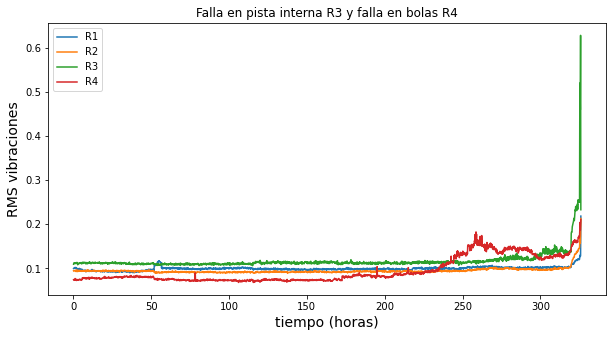

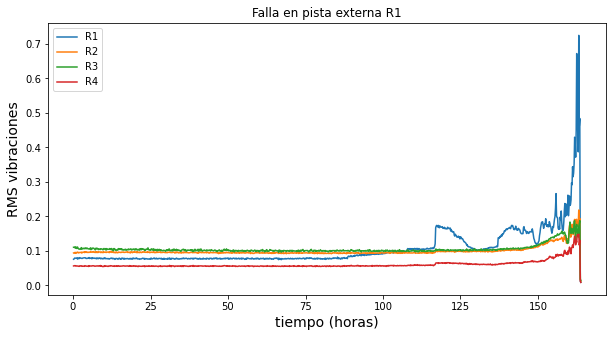

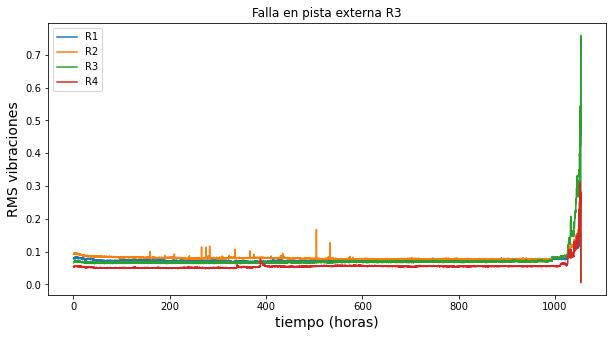

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

#registro de datos de vibraciones en RMS
Datos1 = pd.read_csv('RMSvibraciones1.txt')
Datos2 = pd.read_csv('RMSvibraciones2.txt')
Datos3 = pd.read_csv('RMSvibraciones3.txt')

#registro de tiempo en minutos
t1 = pd.read_csv('time1.txt')
t2 = pd.read_csv('time2.txt')
t3 = pd.read_csv('time3.txt')

plt.figure()
plt.plot(t1/60,Datos1)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.legend(['R1','R2','R3','R4'])
plt.title('Falla en pista interna R3 y falla en bolas R4')

plt.figure()
plt.plot(t2/60,Datos2)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.legend(['R1','R2','R3','R4'])
plt.title('Falla en pista externa R1')

plt.figure()
plt.plot(t3/60,Datos3)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.legend(['R1','R2','R3','R4'])
plt.title('Falla en pista externa R3')




# Ejemplo 2:  Dominio del Tiempo

In [74]:
#importar librerías
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import kurtosis, skew
from numpy import mean, sqrt, square

#Leer datos
Datos0=sio.loadmat('normal.mat')
Datos1=sio.loadmat('outer.mat')
Datos2=sio.loadmat('inner.mat')
Normal=Datos0['normal']
Outer=Datos1['outer']
Inner=Datos2['inner']

#vector de tiempo
Fs=48828 #sampling rate
dt=1/Fs #paso de tiempo
N=len(Normal)
t=np.linspace(0,dt*(N-1),N)



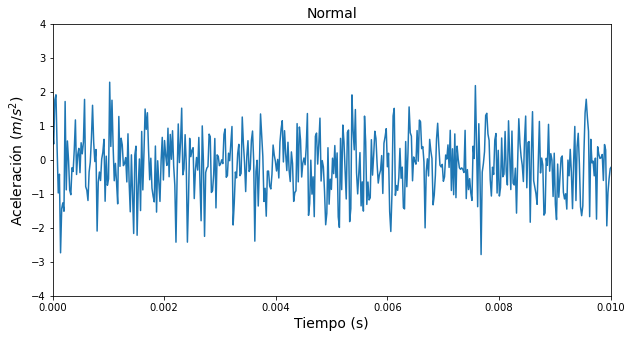

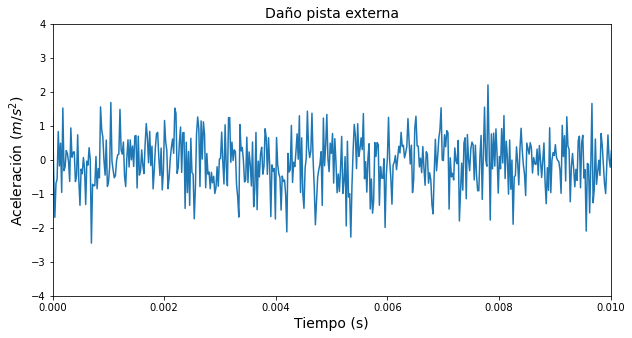

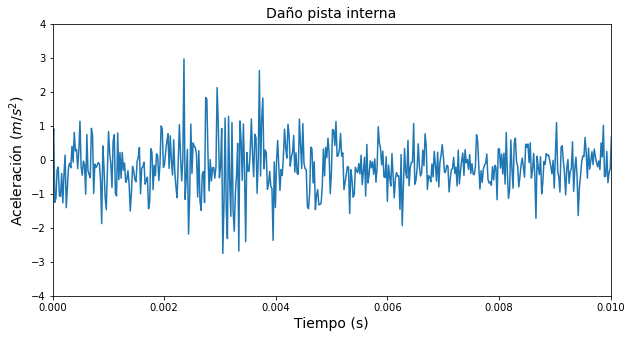

In [75]:
plt.plot(t,Normal)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Normal', fontsize=14)
plt.xlim(0,0.01)
plt.ylim(-4,4)
plt.show()

plt.plot(t,Outer)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Daño pista externa', fontsize=14)
plt.xlim(0,0.01)
plt.ylim(-4,4)
plt.show()

plt.plot(t,Inner)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Daño pista interna', fontsize=14)
plt.xlim(0,0.01)
plt.ylim(-4,4)
plt.show()


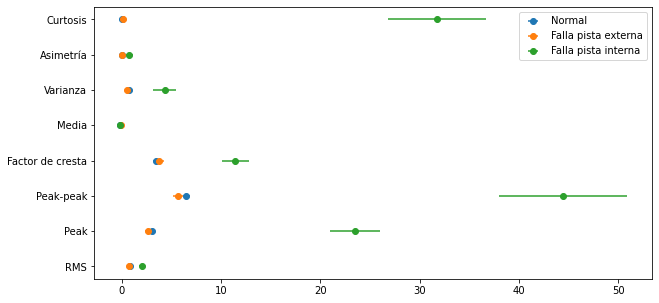

In [76]:
#calcular parametros por tramos
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con parametros
Pn=np.zeros((Nt,8))
Po=np.zeros((Nt,8))
Pi=np.zeros((Nt,8))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn[i-1,0]=sqrt(mean(square(Normal[inicio:fin]))) #RMS
    Pn[i-1,1]=np.amax(Normal[inicio:fin]) #Peak
    Pn[i-1,2]=np.amax(Normal[inicio:fin])-np.amin(Normal[inicio:fin]) #peak-peak
    Pn[i-1,3]=Pn[i-1,1]/Pn[i-1,0] #crest
    Pn[i-1,4]=np.mean(Normal[inicio:fin]) #Media
    Pn[i-1,5]=np.var(Normal[inicio:fin]) #var
    Pn[i-1,6]=skew(Normal[inicio:fin])[0] #asimetria
    Pn[i-1,7]=kurtosis(Normal[inicio:fin])[0] #curtosis
    
    Po[i-1,0]=sqrt(mean(square(Outer[inicio:fin]))) #RMS
    Po[i-1,1]=np.amax(Outer[inicio:fin]) #Peak
    Po[i-1,2]=np.amax(Outer[inicio:fin])-np.amin(Outer[inicio:fin]) #peak-peak
    Po[i-1,3]=Po[i-1,1]/Po[i-1,0] #crest
    Po[i-1,4]=np.mean(Outer[inicio:fin]) #Media
    Po[i-1,5]=np.var(Outer[inicio:fin]) #var
    Po[i-1,6]=skew(Outer[inicio:fin])[0] #asimetria
    Po[i-1,7]=kurtosis(Outer[inicio:fin])[0] #curtosis
    
    Pi[i-1,0]=sqrt(mean(square(Inner[inicio:fin]))) #RMS
    Pi[i-1,1]=np.amax(Inner[inicio:fin]) #Peak
    Pi[i-1,2]=np.amax(Inner[inicio:fin])-np.amin(Inner[inicio:fin]) #peak-peak
    Pi[i-1,3]=Pi[i-1,1]/Pi[i-1,0] #crest
    Pi[i-1,4]=np.mean(Inner[inicio:fin]) #Media
    Pi[i-1,5]=np.var(Inner[inicio:fin]) #var
    Pi[i-1,6]=skew(Inner[inicio:fin])[0] #asimetria
    Pi[i-1,7]=kurtosis(Inner[inicio:fin])[0] #curtosis

#np.save('Pn.npy', Pn) 
#np.save('Po.npy', Po) 
#np.save('Pi.npy', Pi) 

#etiquetas eje y
titulosy=['RMS','Peak','Peak-peak','Factor de cresta','Media','Varianza','Asimetría','Curtosis']

       
plt.figure()        
plt.errorbar(Pn.mean(axis=0), np.arange(8),xerr=Pn.std(axis=0) , fmt='o')
plt.errorbar(Po.mean(axis=0), np.arange(8),xerr=Po.std(axis=0) , fmt='o')
plt.errorbar(Pi.mean(axis=0), np.arange(8),xerr=Pi.std(axis=0) , fmt='o')
plt.yticks(np.arange(8),titulosy)
plt.legend(('Normal','Falla pista externa','Falla pista interna'))
plt.show() 

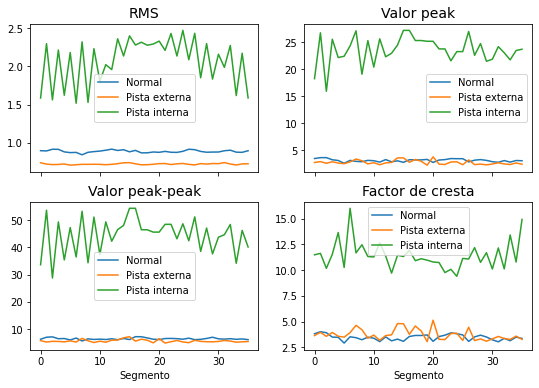

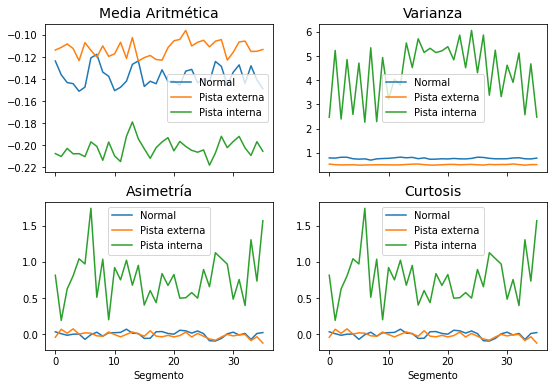

In [77]:
#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn[:,0])
ax1.plot(Po[:,0])
ax1.plot(Pi[:,0])
ax1.legend(['Normal','Pista externa','Pista interna'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn[:,1])
ax2.plot(Po[:,1])
ax2.plot(Pi[:,1])
ax2.legend(['Normal','Pista externa','Pista interna'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn[:,2])
ax3.plot(Po[:,2])
ax3.plot(Pi[:,2])
ax3.legend(['Normal','Pista externa','Pista interna'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn[:,3])
ax4.plot(Po[:,3])
ax4.plot(Pi[:,3])
ax4.legend(['Normal','Pista externa','Pista interna'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn[:,4])
ax5.plot(Po[:,4])
ax5.plot(Pi[:,4])
ax5.legend(['Normal','Pista externa','Pista interna'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn[:,5])
ax6.plot(Po[:,5])
ax6.plot(Pi[:,5])
ax6.legend(['Normal','Pista externa','Pista interna'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn[:,6])
ax7.plot(Po[:,6])
ax7.plot(Pi[:,6])
ax7.legend(['Normal','Pista externa','Pista interna'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn[:,6])
ax8.plot(Po[:,6])
ax8.plot(Pi[:,6])
ax8.legend(['Normal','Pista externa','Pista interna'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()



In [78]:
#Leer datos
Datos0=sio.loadmat('normal.mat')
Datos1=sio.loadmat('outer.mat')
Datos2=sio.loadmat('inner.mat')
Normal=Datos0['normal']
Outer=Datos1['outer']
Inner=Datos2['inner']

# Integral

Normal=Normal[1:N]+Normal[0:N-1]
Outer=Outer[1:N]+Outer[0:N-1]
Inner=Inner[1:N]+Inner[0:N-1]
t=np.linspace(0,dt*(N-2),N-1)



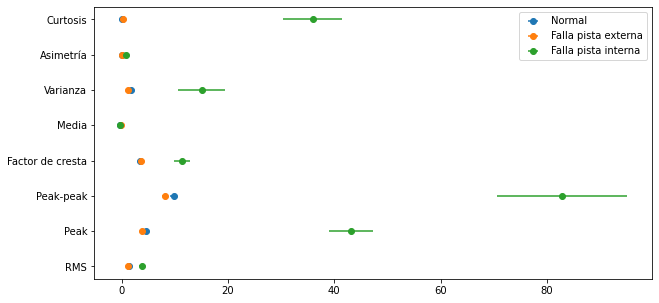

In [79]:
#calcular parametros por tramos
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con parametros
Pn=np.zeros((Nt,8))
Po=np.zeros((Nt,8))
Pi=np.zeros((Nt,8))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn[i-1,0]=sqrt(mean(square(Normal[inicio:fin]))) #RMS
    Pn[i-1,1]=np.amax(Normal[inicio:fin]) #Peak
    Pn[i-1,2]=np.amax(Normal[inicio:fin])-np.amin(Normal[inicio:fin]) #peak-peak
    Pn[i-1,3]=Pn[i-1,1]/Pn[i-1,0] #crest
    Pn[i-1,4]=np.mean(Normal[inicio:fin]) #Media
    Pn[i-1,5]=np.var(Normal[inicio:fin]) #var
    Pn[i-1,6]=skew(Normal[inicio:fin])[0] #asimetria
    Pn[i-1,7]=kurtosis(Normal[inicio:fin])[0] #curtosis
    
    Po[i-1,0]=sqrt(mean(square(Outer[inicio:fin]))) #RMS
    Po[i-1,1]=np.amax(Outer[inicio:fin]) #Peak
    Po[i-1,2]=np.amax(Outer[inicio:fin])-np.amin(Outer[inicio:fin]) #peak-peak
    Po[i-1,3]=Po[i-1,1]/Po[i-1,0] #crest
    Po[i-1,4]=np.mean(Outer[inicio:fin]) #Media
    Po[i-1,5]=np.var(Outer[inicio:fin]) #var
    Po[i-1,6]=skew(Outer[inicio:fin])[0] #asimetria
    Po[i-1,7]=kurtosis(Outer[inicio:fin])[0] #curtosis
    
    Pi[i-1,0]=sqrt(mean(square(Inner[inicio:fin]))) #RMS
    Pi[i-1,1]=np.amax(Inner[inicio:fin]) #Peak
    Pi[i-1,2]=np.amax(Inner[inicio:fin])-np.amin(Inner[inicio:fin]) #peak-peak
    Pi[i-1,3]=Pi[i-1,1]/Pi[i-1,0] #crest
    Pi[i-1,4]=np.mean(Inner[inicio:fin]) #Media
    Pi[i-1,5]=np.var(Inner[inicio:fin]) #var
    Pi[i-1,6]=skew(Inner[inicio:fin])[0] #asimetria
    Pi[i-1,7]=kurtosis(Inner[inicio:fin])[0] #curtosis

#np.save('Pn.npy', Pn) 
#np.save('Po.npy', Po) 
#np.save('Pi.npy', Pi) 

#etiquetas eje y
titulosy=['RMS','Peak','Peak-peak','Factor de cresta','Media','Varianza','Asimetría','Curtosis']

       
plt.figure()        
plt.errorbar(Pn.mean(axis=0), np.arange(8),xerr=Pn.std(axis=0) , fmt='o')
plt.errorbar(Po.mean(axis=0), np.arange(8),xerr=Po.std(axis=0) , fmt='o')
plt.errorbar(Pi.mean(axis=0), np.arange(8),xerr=Pi.std(axis=0) , fmt='o')
plt.yticks(np.arange(8),titulosy)
plt.legend(('Normal','Falla pista externa','Falla pista interna'))
plt.show() 

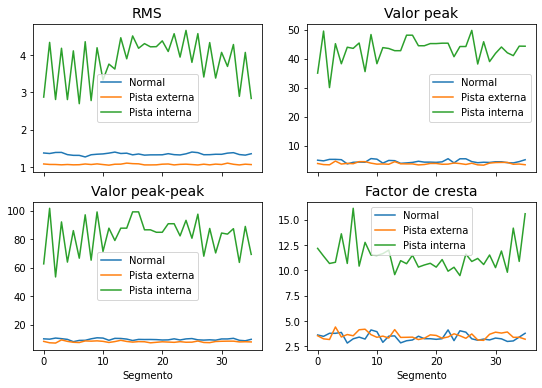

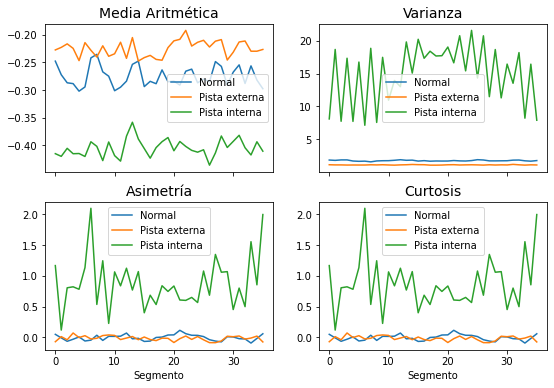

In [80]:
#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn[:,0])
ax1.plot(Po[:,0])
ax1.plot(Pi[:,0])
ax1.legend(['Normal','Pista externa','Pista interna'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn[:,1])
ax2.plot(Po[:,1])
ax2.plot(Pi[:,1])
ax2.legend(['Normal','Pista externa','Pista interna'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn[:,2])
ax3.plot(Po[:,2])
ax3.plot(Pi[:,2])
ax3.legend(['Normal','Pista externa','Pista interna'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn[:,3])
ax4.plot(Po[:,3])
ax4.plot(Pi[:,3])
ax4.legend(['Normal','Pista externa','Pista interna'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn[:,4])
ax5.plot(Po[:,4])
ax5.plot(Pi[:,4])
ax5.legend(['Normal','Pista externa','Pista interna'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn[:,5])
ax6.plot(Po[:,5])
ax6.plot(Pi[:,5])
ax6.legend(['Normal','Pista externa','Pista interna'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn[:,6])
ax7.plot(Po[:,6])
ax7.plot(Pi[:,6])
ax7.legend(['Normal','Pista externa','Pista interna'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn[:,6])
ax8.plot(Po[:,6])
ax8.plot(Pi[:,6])
ax8.legend(['Normal','Pista externa','Pista interna'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()



In [81]:
#Leer datos
Datos0=sio.loadmat('normal.mat')
Datos1=sio.loadmat('outer.mat')
Datos2=sio.loadmat('inner.mat')
Normal=Datos0['normal']
Outer=Datos1['outer']
Inner=Datos2['inner']

# Derivada
Normal=Normal[1:N]-Normal[0:N-1]
Outer=Outer[1:N]-Outer[0:N-1]
Inner=Inner[1:N]-Inner[0:N-1]
t=np.linspace(0,dt*(N-2),N-1)



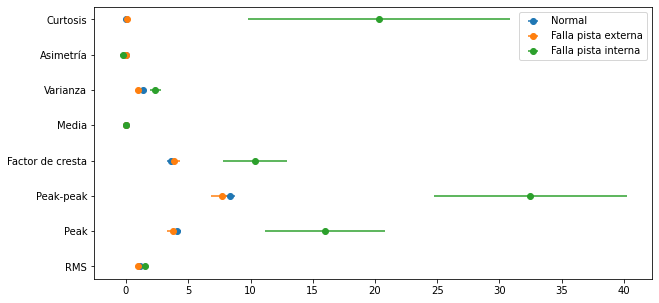

In [82]:
#calcular parametros por tramos
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con parametros
Pn=np.zeros((Nt,8))
Po=np.zeros((Nt,8))
Pi=np.zeros((Nt,8))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn[i-1,0]=sqrt(mean(square(Normal[inicio:fin]))) #RMS
    Pn[i-1,1]=np.amax(Normal[inicio:fin]) #Peak
    Pn[i-1,2]=np.amax(Normal[inicio:fin])-np.amin(Normal[inicio:fin]) #peak-peak
    Pn[i-1,3]=Pn[i-1,1]/Pn[i-1,0] #crest
    Pn[i-1,4]=np.mean(Normal[inicio:fin]) #Media
    Pn[i-1,5]=np.var(Normal[inicio:fin]) #var
    Pn[i-1,6]=skew(Normal[inicio:fin])[0] #asimetria
    Pn[i-1,7]=kurtosis(Normal[inicio:fin])[0] #curtosis
    
    Po[i-1,0]=sqrt(mean(square(Outer[inicio:fin]))) #RMS
    Po[i-1,1]=np.amax(Outer[inicio:fin]) #Peak
    Po[i-1,2]=np.amax(Outer[inicio:fin])-np.amin(Outer[inicio:fin]) #peak-peak
    Po[i-1,3]=Po[i-1,1]/Po[i-1,0] #crest
    Po[i-1,4]=np.mean(Outer[inicio:fin]) #Media
    Po[i-1,5]=np.var(Outer[inicio:fin]) #var
    Po[i-1,6]=skew(Outer[inicio:fin])[0] #asimetria
    Po[i-1,7]=kurtosis(Outer[inicio:fin])[0] #curtosis
    
    Pi[i-1,0]=sqrt(mean(square(Inner[inicio:fin]))) #RMS
    Pi[i-1,1]=np.amax(Inner[inicio:fin]) #Peak
    Pi[i-1,2]=np.amax(Inner[inicio:fin])-np.amin(Inner[inicio:fin]) #peak-peak
    Pi[i-1,3]=Pi[i-1,1]/Pi[i-1,0] #crest
    Pi[i-1,4]=np.mean(Inner[inicio:fin]) #Media
    Pi[i-1,5]=np.var(Inner[inicio:fin]) #var
    Pi[i-1,6]=skew(Inner[inicio:fin])[0] #asimetria
    Pi[i-1,7]=kurtosis(Inner[inicio:fin])[0] #curtosis

#np.save('Pn.npy', Pn) 
#np.save('Po.npy', Po) 
#np.save('Pi.npy', Pi) 

#etiquetas eje y
titulosy=['RMS','Peak','Peak-peak','Factor de cresta','Media','Varianza','Asimetría','Curtosis']

       
plt.figure()        
plt.errorbar(Pn.mean(axis=0), np.arange(8),xerr=Pn.std(axis=0) , fmt='o')
plt.errorbar(Po.mean(axis=0), np.arange(8),xerr=Po.std(axis=0) , fmt='o')
plt.errorbar(Pi.mean(axis=0), np.arange(8),xerr=Pi.std(axis=0) , fmt='o')
plt.yticks(np.arange(8),titulosy)
plt.legend(('Normal','Falla pista externa','Falla pista interna'))
plt.show() 

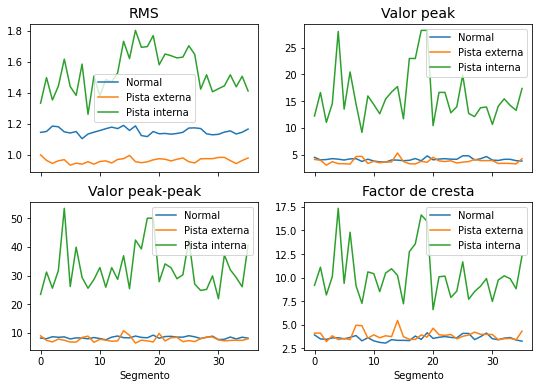

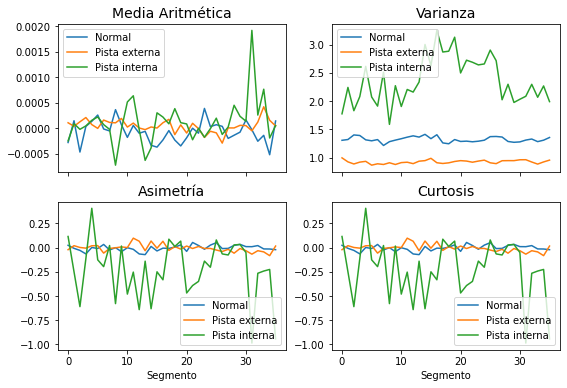

In [83]:
#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn[:,0])
ax1.plot(Po[:,0])
ax1.plot(Pi[:,0])
ax1.legend(['Normal','Pista externa','Pista interna'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn[:,1])
ax2.plot(Po[:,1])
ax2.plot(Pi[:,1])
ax2.legend(['Normal','Pista externa','Pista interna'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn[:,2])
ax3.plot(Po[:,2])
ax3.plot(Pi[:,2])
ax3.legend(['Normal','Pista externa','Pista interna'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn[:,3])
ax4.plot(Po[:,3])
ax4.plot(Pi[:,3])
ax4.legend(['Normal','Pista externa','Pista interna'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn[:,4])
ax5.plot(Po[:,4])
ax5.plot(Pi[:,4])
ax5.legend(['Normal','Pista externa','Pista interna'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn[:,5])
ax6.plot(Po[:,5])
ax6.plot(Pi[:,5])
ax6.legend(['Normal','Pista externa','Pista interna'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn[:,6])
ax7.plot(Po[:,6])
ax7.plot(Pi[:,6])
ax7.legend(['Normal','Pista externa','Pista interna'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn[:,6])
ax8.plot(Po[:,6])
ax8.plot(Pi[:,6])
ax8.legend(['Normal','Pista externa','Pista interna'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()



# Ejemplo 3: Dominio de la frecuencia

Calcular promedio del espectro en bandas de frecuencia. (Division en octavas: dividir en 8 bandas de frecuencia)

In [84]:
#importar librerias
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft

#Leer datos
Datos0=sio.loadmat('normal.mat')
Datos1=sio.loadmat('outer.mat')
Datos2=sio.loadmat('inner.mat')
Normal=Datos0['normal'][:,0]
Outer=Datos1['outer'][:,0]
Inner=Datos2['inner'][:,0]

#########Datos de entrada##################
Fs=48828 #frecuencia de muestreo
Fmax=10000 #frecuencia máxima -> debe ser menor o igual a Fs/2
L=5000 #largo de los segmentos
l=1000 #overlap
nb=10 #numero de bandas
##############################################


In [85]:
dt=1/Fs #paso de tiempo
df=Fs/L
Nf=int(Fmax/df) #numero de líneas en los espectros
N=len(Normal) #numero de datos
Nt=math.floor((N-l)/(L-l)) #total de segmentos

En=np.zeros((Nt,nb))
Eo=np.zeros((Nt,nb))
Ei=np.zeros((Nt,nb))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Fn = fft(Normal[inicio:fin])[0:Nf]/(L/2)
    Fo = fft(Outer[inicio:fin])[0:Nf]/(L/2)
    Fi = fft(Inner[inicio:fin])[0:Nf]/(L/2)
    
    Lb=int(Nf/nb)
    for k in range(1,nb+1):
        inicio=Lb*(k-1)+1
        fin=k*Lb
        En[i-1][k-1]=np.mean(abs(Fn[inicio:fin]))
        Eo[i-1][k-1]=np.mean(abs(Fo[inicio:fin]))
        Ei[i-1][k-1]=np.mean(abs(Fi[inicio:fin]))



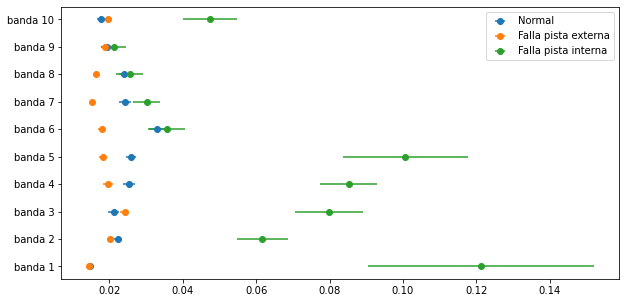

In [86]:
np.save('En.npy', En) 
np.save('Eo.npy', Eo) 
np.save('Ei.npy', Ei) 

#etiquetas eje y
titulosy=['banda 1']
for i in range(2,nb+1):
    titulosy.append('banda ' + str(i))

plt.rcParams["figure.figsize"] = (10,5)       
plt.figure()        
plt.errorbar(En.mean(axis=0), np.arange(nb),xerr=En.std(axis=0) , fmt='o')
plt.errorbar(Eo.mean(axis=0), np.arange(nb),xerr=Eo.std(axis=0) , fmt='o')
plt.errorbar(Ei.mean(axis=0), np.arange(nb),xerr=Ei.std(axis=0) , fmt='o')
plt.yticks(np.arange(nb),titulosy)
plt.legend(('Normal','Falla pista externa','Falla pista interna'))
plt.show() 


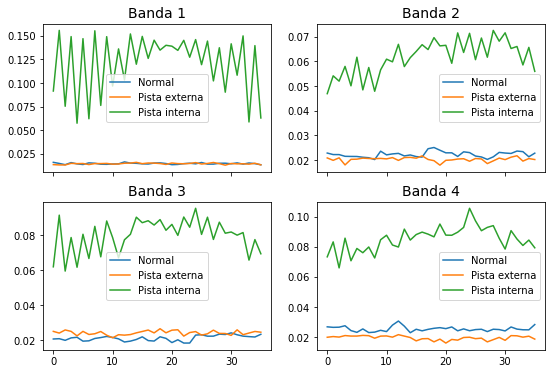

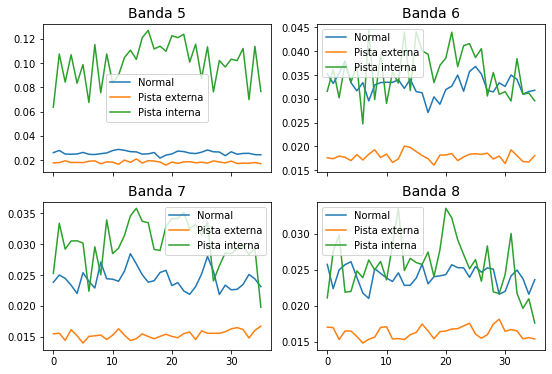

In [87]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))

ax1.plot(En[:,0])
ax1.plot(Eo[:,0])
ax1.plot(Ei[:,0])
ax1.legend(['Normal','Pista externa','Pista interna'])
ax1.set_title('Banda 1', fontsize=14)

ax2.plot(En[:,1])
ax2.plot(Eo[:,1])
ax2.plot(Ei[:,1])
ax2.legend(['Normal','Pista externa','Pista interna'])
ax2.set_title('Banda 2', fontsize=14)

ax3.plot(En[:,2])
ax3.plot(Eo[:,2])
ax3.plot(Ei[:,2])
ax3.legend(['Normal','Pista externa','Pista interna'])
ax3.set_title('Banda 3', fontsize=14)

ax4.plot(En[:,3])
ax4.plot(Eo[:,3])
ax4.plot(Ei[:,3])
ax4.legend(['Normal','Pista externa','Pista interna'])
ax4.set_title('Banda 4', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(En[:,4])
ax5.plot(Eo[:,4])
ax5.plot(Ei[:,4])
ax5.legend(['Normal','Pista externa','Pista interna'])
ax5.set_title('Banda 5', fontsize=14)

ax6.plot(En[:,5])
ax6.plot(Eo[:,5])
ax6.plot(Ei[:,5])
ax6.legend(['Normal','Pista externa','Pista interna'])
ax6.set_title('Banda 6', fontsize=14)

ax7.plot(En[:,6])
ax7.plot(Eo[:,6])
ax7.plot(Ei[:,6])
ax7.legend(['Normal','Pista externa','Pista interna'])
ax7.set_title('Banda 7', fontsize=14)

ax8.plot(En[:,7])
ax8.plot(Eo[:,7])
ax8.plot(Ei[:,7])
ax8.legend(['Normal','Pista externa','Pista interna'])
ax8.set_title('Banda 8', fontsize=14)

np.save('En.npy', En) 
np.save('Eo.npy', Eo) 
np.save('Ei.npy', Ei) 

